<a href="https://colab.research.google.com/github/RM-RITIK/NLP_basic_projects/blob/master/session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tokenization

In [0]:
import nltk

In [0]:
text = "This is Andrew's text, isn't it?"

In [0]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokenizer.tokenize(text)

['This', 'is', "Andrew's", 'text,', "isn't", 'it?']

In [0]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Andrew', "'s", 'text', ',', 'is', "n't", 'it', '?']

In [0]:
tokenizer = nltk.tokenize.WordPunctTokenizer();
tokenizer.tokenize(text)

['This', 'is', 'Andrew', "'", 's', 'text', ',', 'isn', "'", 't', 'it', '?']

In [0]:
import nltk

In [0]:
text = "feet cats wolves talked"
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

In [0]:
stemmer = nltk.stem.PorterStemmer()
" ".join(stemmer.stem(token) for token in tokens)

'feet cat wolv talk'

In [0]:
nltk.download('wordnet')
stemmer = nltk.stem.WordNetLemmatizer()
" ".join(stemmer.lemmatize(token) for token in tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'foot cat wolf talked'

## Feature extraction from the text

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

texts = ["good movie", "not a good movie", "did not like", "i like it", "good one"]
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1, 2))
features = tfidf.fit_transform(texts)

pd.DataFrame(
    features.todense(),
    columns = tfidf.get_feature_names()
)

,good movie,like,movie,not
0,0.707107,0.000000,0.707107,0.000000
1,0.577350,0.000000,0.577350,0.577350
2,0.000000,0.707107,0.000000,0.707107
3,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000


#Linear Models for Sentiment Analysis

In [0]:
from google.colab import files
upload = files.upload()

Saving aclImdb_v1.tar.gz to aclImdb_v1.tar.gz


In [0]:
import shutil
shutil.unpack_archive("/content/aclImdb_v1.tar.gz", "/content/data_1")
from sklearn.datasets import load_files
review_train = load_files("/content/data_1/aclImdb/train/")

In [0]:
import numpy as np
text_train, y_train = review_train.data, review_train.target
print("Number of documents in train data: {}".format(len(text_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))

Number of documents in train data: 25000
Samples per class (train): [12500 12500]


In [0]:
review_test = load_files("/content/data_1/aclImdb/test/")
text_test, y_test = review_test.data, review_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


Removing Data for Unsupervised Learning

In [0]:
%rm - rf <unsup>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `rm - rf </content/data_1/aclImdb/train/unsup>'


In [0]:
cd /content/data_1/aclImdb/train/

/content/data_1/aclImdb/train


In [0]:
ls

labeledBow.feat  pos/    unsupBow.feat  urls_pos.txt
neg/             unsup/  urls_neg.txt   urls_unsup.txt


In [0]:
!rm -rf "unsup"

In [0]:
ls

labeledBow.feat  pos/           urls_neg.txt  urls_unsup.txt
neg/             unsupBow.feat  urls_pos.txt


**Feature Extraction**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 5, max_df = 0.5, ngram_range = (2, 2))
X_train = tfidf.fit_transform(text_train)
X_test = tfidf.transform(text_test)
print("Vocabulary size: {}".format(len(tfidf.vocabulary_)))
print("X_train:\n{}".format(repr(X_train)))
print("X_test: \n{}".format(repr(X_test)))

feature_names = tfidf.get_feature_names()
print("Number of features: {}".format(len(feature_names)))



Vocabulary size: 129546
X_train:
<25000x129546 sparse matrix of type '<class 'numpy.float64'>'
	with 3563285 stored elements in Compressed Sparse Row format>
X_test: 
<25000x129546 sparse matrix of type '<class 'numpy.float64'>'
	with 3348744 stored elements in Compressed Sparse Row format>
Number of features: 129546


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.89
Best parameters:  {'C': 10}
Best estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


     |████████████████████████████████| 542kB 2.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=7f3d1a76f6c1c9d9b84d831ab16037f2bbbe92d6e8220a7b3da2103ca84df5ca
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


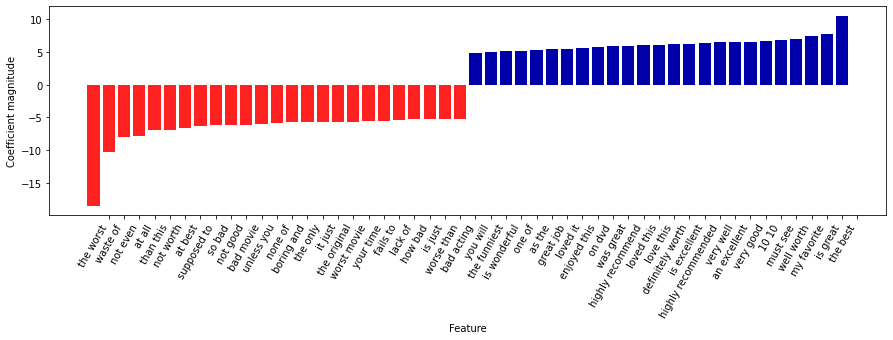

In [0]:
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=25)
plt.show()

In [0]:
lr = grid.best_estimator_
lr.fit(X_train, y_train)
lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, y_test)))

Score: 0.89


In [0]:
import pickle
filename = '/content/data_1/aclImdb/model_1.sav'
pickle.dump(lr, open(filename, 'wb'))